# Лаболаторная работа №5. 
"Линейные модели, SVM и деревья решений."<br>
<br>
<b>Цель лабораторной работы:</b> изучение линейных моделей, SVM и деревьев решений.

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, cross_validate, KFold, LeaveOneOut, GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline 
sns.set(style="ticks")

In [4]:
# Вывод матрицы ошибок в графическом виде
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data   
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [5]:
data = pd.read_csv('../DataSets/mobile-price-classification/train.csv', sep=',')
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
#Разделим выборку на обучающую и тестовую
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(data[['clock_speed','int_memory','ram','three_g', 'dual_sim', 'talk_time']],data['price_range'], test_size=0.4, random_state = 10)
print(trainX.shape, trainY.shape)
print(testX.shape,testY.shape)

(1200, 6) (1200,)
(800, 6) (800,)


<b>Обучение моделей</b>

In [7]:
#Обучим модели:
svc = SVC(gamma = 10)
svc.fit(trainX, trainY)

decision_tree_classifier = DecisionTreeClassifier(max_depth = 4)
decision_tree_classifier.fit(trainX, trainY)

SGD_сlassifier = SGDClassifier()
SGD_сlassifier.fit(trainX, trainY)

predY = {}
predY["SGD сlassifier"] = SGD_сlassifier.predict(testX)
predY["decision tree classifier"] = decision_tree_classifier.predict(testX)
predY["SVC"] = svc.predict(testX)

<b>Оценка качества</b>

In [8]:
#accuracy_score
for key, predictionY in predY.items():
    print("Точность: {:.2f}% Модель: {}".format(accuracy_score(testY,predictionY)*100, key))

Точность: 25.87% Модель: SGD сlassifier
Точность: 74.75% Модель: decision tree classifier
Точность: 24.12% Модель: SVC


Confusion matrix, without normalization
Confusion matrix, without normalization
Confusion matrix, without normalization


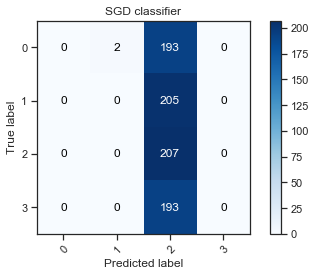

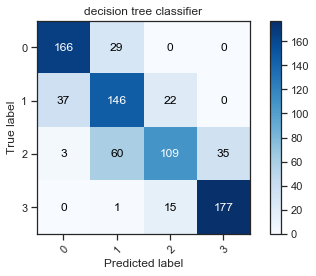

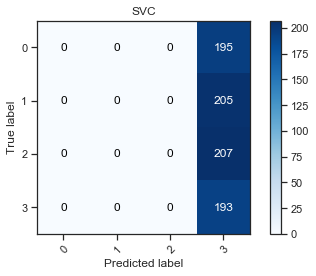

In [9]:
#Confusion Matrix
for key, predictionY in predY.items():
    plot_confusion_matrix(y_true = testY, y_pred = predictionY, classes = unique_labels(testY), title=key)

In [10]:
#classification_report
for key, predictionY in predY.items():
    print(key)
    print(classification_report(testY, predictionY))

SGD сlassifier
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       195
           1       0.00      0.00      0.00       205
           2       0.26      1.00      0.41       207
           3       0.00      0.00      0.00       193

   micro avg       0.26      0.26      0.26       800
   macro avg       0.06      0.25      0.10       800
weighted avg       0.07      0.26      0.11       800

decision tree classifier
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       195
           1       0.62      0.71      0.66       205
           2       0.75      0.53      0.62       207
           3       0.83      0.92      0.87       193

   micro avg       0.75      0.75      0.75       800
   macro avg       0.75      0.75      0.75       800
weighted avg       0.75      0.75      0.74       800

SVC
              precision    recall  f1-score   support

           0       0.00      0.

D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, wa

<b>Подбор гиперпараметра:</b>

In [26]:
GammaTP = alphaTP = [0.001,0.01,0.1,1,10,100,1000]
DepthTP = range(1,11)
kf = KFold(n_splits=3)

tuned_parameters = [{'alpha':alphaTP}]
SGD_сlassifier_grid_search = GridSearchCV(SGDClassifier(), tuned_parameters, cv=kf, scoring='accuracy')
SGD_сlassifier_grid_search.fit(trainX, trainY)
SGD_сlassifier_best_param = SGD_сlassifier_grid_search.best_params_.get('alpha')
print("Лучший параметр (alpha) Стохастический градиентный спуск (SGDClassifier): {}".format(SGD_сlassifier_best_param))

tuned_parameters = [{'gamma':GammaTP}]
SVC_grid_search = GridSearchCV(SVC(), tuned_parameters, cv=kf, scoring='accuracy')
SVC_grid_search.fit(trainX, trainY)
SVC_best_param = SVC_grid_search.best_params_.get('gamma')
print("Лучший параметр (gamma) метод опорных векторов (SVC): {}".format(SVC_best_param))

tuned_parameters = [{'max_depth':DepthTP}]
decision_tree_classifier_grid_search = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, cv=kf, scoring='accuracy')
decision_tree_classifier_grid_search.fit(trainX, trainY)
decision_tree_classifier_best_param = decision_tree_classifier_grid_search.best_params_.get('max_depth')
print("Лучший параметр (max_depth) решающие деревья (DecisionTreeClassifier): {}".format(decision_tree_classifier_best_param))

Лучший параметр (alpha) Стохастический градиентный спуск (SGDClassifier): 10
Лучший параметр (gamma) метод опорных векторов (SVC): 0.001
Лучший параметр (max_depth) решающие деревья (DecisionTreeClassifier): 2


In [27]:
#Переобучим модели с оптимальными параметрами:
svc = SVC(gamma = SVC_best_param)
svc.fit(trainX, trainY)

decision_tree_classifier = DecisionTreeClassifier(max_depth = decision_tree_classifier_best_param)
decision_tree_classifier.fit(trainX, trainY)

SGD_сlassifier = SGDClassifier(alpha = SGD_сlassifier_best_param)
SGD_сlassifier.fit(trainX, trainY)

predY = {}
predY["SGD сlassifier"] = SGD_сlassifier.predict(testX)
predY["decision tree classifier"] = decision_tree_classifier.predict(testX)
predY["SVC"] = svc.predict(testX)

<b>Оценка качества новых моделей:</b>

In [28]:
#accuracy_score
for key, predictionY in predY.items():
    print("Точность: {:.2f}% Модель: {}".format(accuracy_score(testY,predictionY)*100, key))

Точность: 25.62% Модель: SGD сlassifier
Точность: 76.00% Модель: decision tree classifier
Точность: 75.38% Модель: SVC


Confusion matrix, without normalization
Confusion matrix, without normalization
Confusion matrix, without normalization


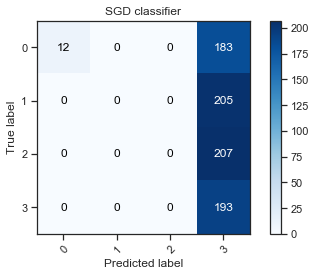

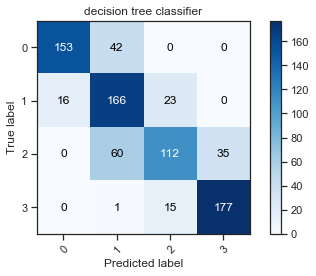

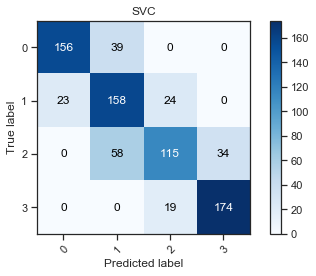

In [29]:
#Confusion Matrix
for key, predictionY in predY.items():
    plot_confusion_matrix(y_true = testY, y_pred = predictionY, classes = unique_labels(testY), title=key)

In [30]:
#classification_report
for key, predictionY in predY.items():
    print(key)
    print(classification_report(testY, predictionY))

SGD сlassifier
              precision    recall  f1-score   support

           0       1.00      0.06      0.12       195
           1       0.00      0.00      0.00       205
           2       0.00      0.00      0.00       207
           3       0.24      1.00      0.39       193

   micro avg       0.26      0.26      0.26       800
   macro avg       0.31      0.27      0.13       800
weighted avg       0.30      0.26      0.12       800

decision tree classifier
              precision    recall  f1-score   support

           0       0.91      0.78      0.84       195
           1       0.62      0.81      0.70       205
           2       0.75      0.54      0.63       207
           3       0.83      0.92      0.87       193

   micro avg       0.76      0.76      0.76       800
   macro avg       0.78      0.76      0.76       800
weighted avg       0.77      0.76      0.76       800

SVC
              precision    recall  f1-score   support

           0       0.87      0.

D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
